In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import os
from geostatbench import BayesInvBench, parula_map

In [19]:
benchmark = BayesInvBench(pathlib.Path("../config/config.yaml").resolve())
benchmark.scenario_name = "S4"
# add directory of data
benchmark.data_directory =  pathlib.Path.joinpath(benchmark.current_dir, "data")
# set reference path
benchmark.set_reference_path()
# set reference chain file paths
benchmark.set_reference_chain_file_paths()
# print(benchmark.reference_chain_file_paths)
benchmark.load_replication_piezometric_head()
benchmark.prepare_reference_data()
benchmark.set_replication_name("rep_S4b_EnKF")
benchmark.plot_ref_mean_field()
benchmark.get_benchmark_table()

2024-01-23 18:49:53 [INFO] geostatbench - API key:SEC-RET
2024-01-23 18:49:53 [INFO] geostatbench - F:\ls3_geo_stat_bench\data\reference\pCN-PT MCMC_xu_2020\ref_S4
2024-01-23 18:49:53 [INFO] geostatbench - F:\ls3_geo_stat_bench\data\reference\pCN-PT MCMC_xu_2020\ref_S4
2024-01-23 18:49:53 [INFO] geostatbench - S4b_reference_observations.out
2024-01-23 18:49:53 [INFO] geostatbench - S4_posterior_lnK_chain1_01.h5
2024-01-23 18:49:53 [INFO] geostatbench - S4_posterior_lnK_chain1_02.h5
2024-01-23 18:49:53 [INFO] geostatbench - S4_posterior_lnK_chain1_03.h5
2024-01-23 18:49:53 [INFO] geostatbench - S4_posterior_lnK_chain2_01.h5
2024-01-23 18:49:53 [INFO] geostatbench - S4_posterior_lnK_chain2_02.h5
2024-01-23 18:49:53 [INFO] geostatbench - S4_posterior_lnK_chain2_03.h5
2024-01-23 18:49:53 [INFO] geostatbench - Found 6 files: ['F:\\ls3_geo_stat_bench\\data\\reference\\pCN-PT MCMC_xu_2020\\ref_S4\\S4_posterior_lnK_chain1_01.h5', 'F:\\ls3_geo_stat_bench\\data\\reference\\pCN-PT MCMC_xu_2020\\r

Original  Normalized  TNormalized
$NMAE^*$       0.808008    0.659473     0.397399
$NMAE^*$ std   0.520498    0.625308     0.384732
$NRMSE^*$      1.034672    0.660390     0.397732
$NRMSE^*$ std  0.604691    0.656667     0.396378
$AD_{KS}$      0.341064    0.341064     0.341064
$ND_E$         8.073391    0.378888     0.378888

2024-01-23 18:46:34 [INFO] geostatbench - Wrote metrics into bench_df
[0.397 0.385 0.398 0.396 0.341 0.379]
2024-01-23 18:46:37 [WARNING] matplotlib.backends.backend_ps - The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


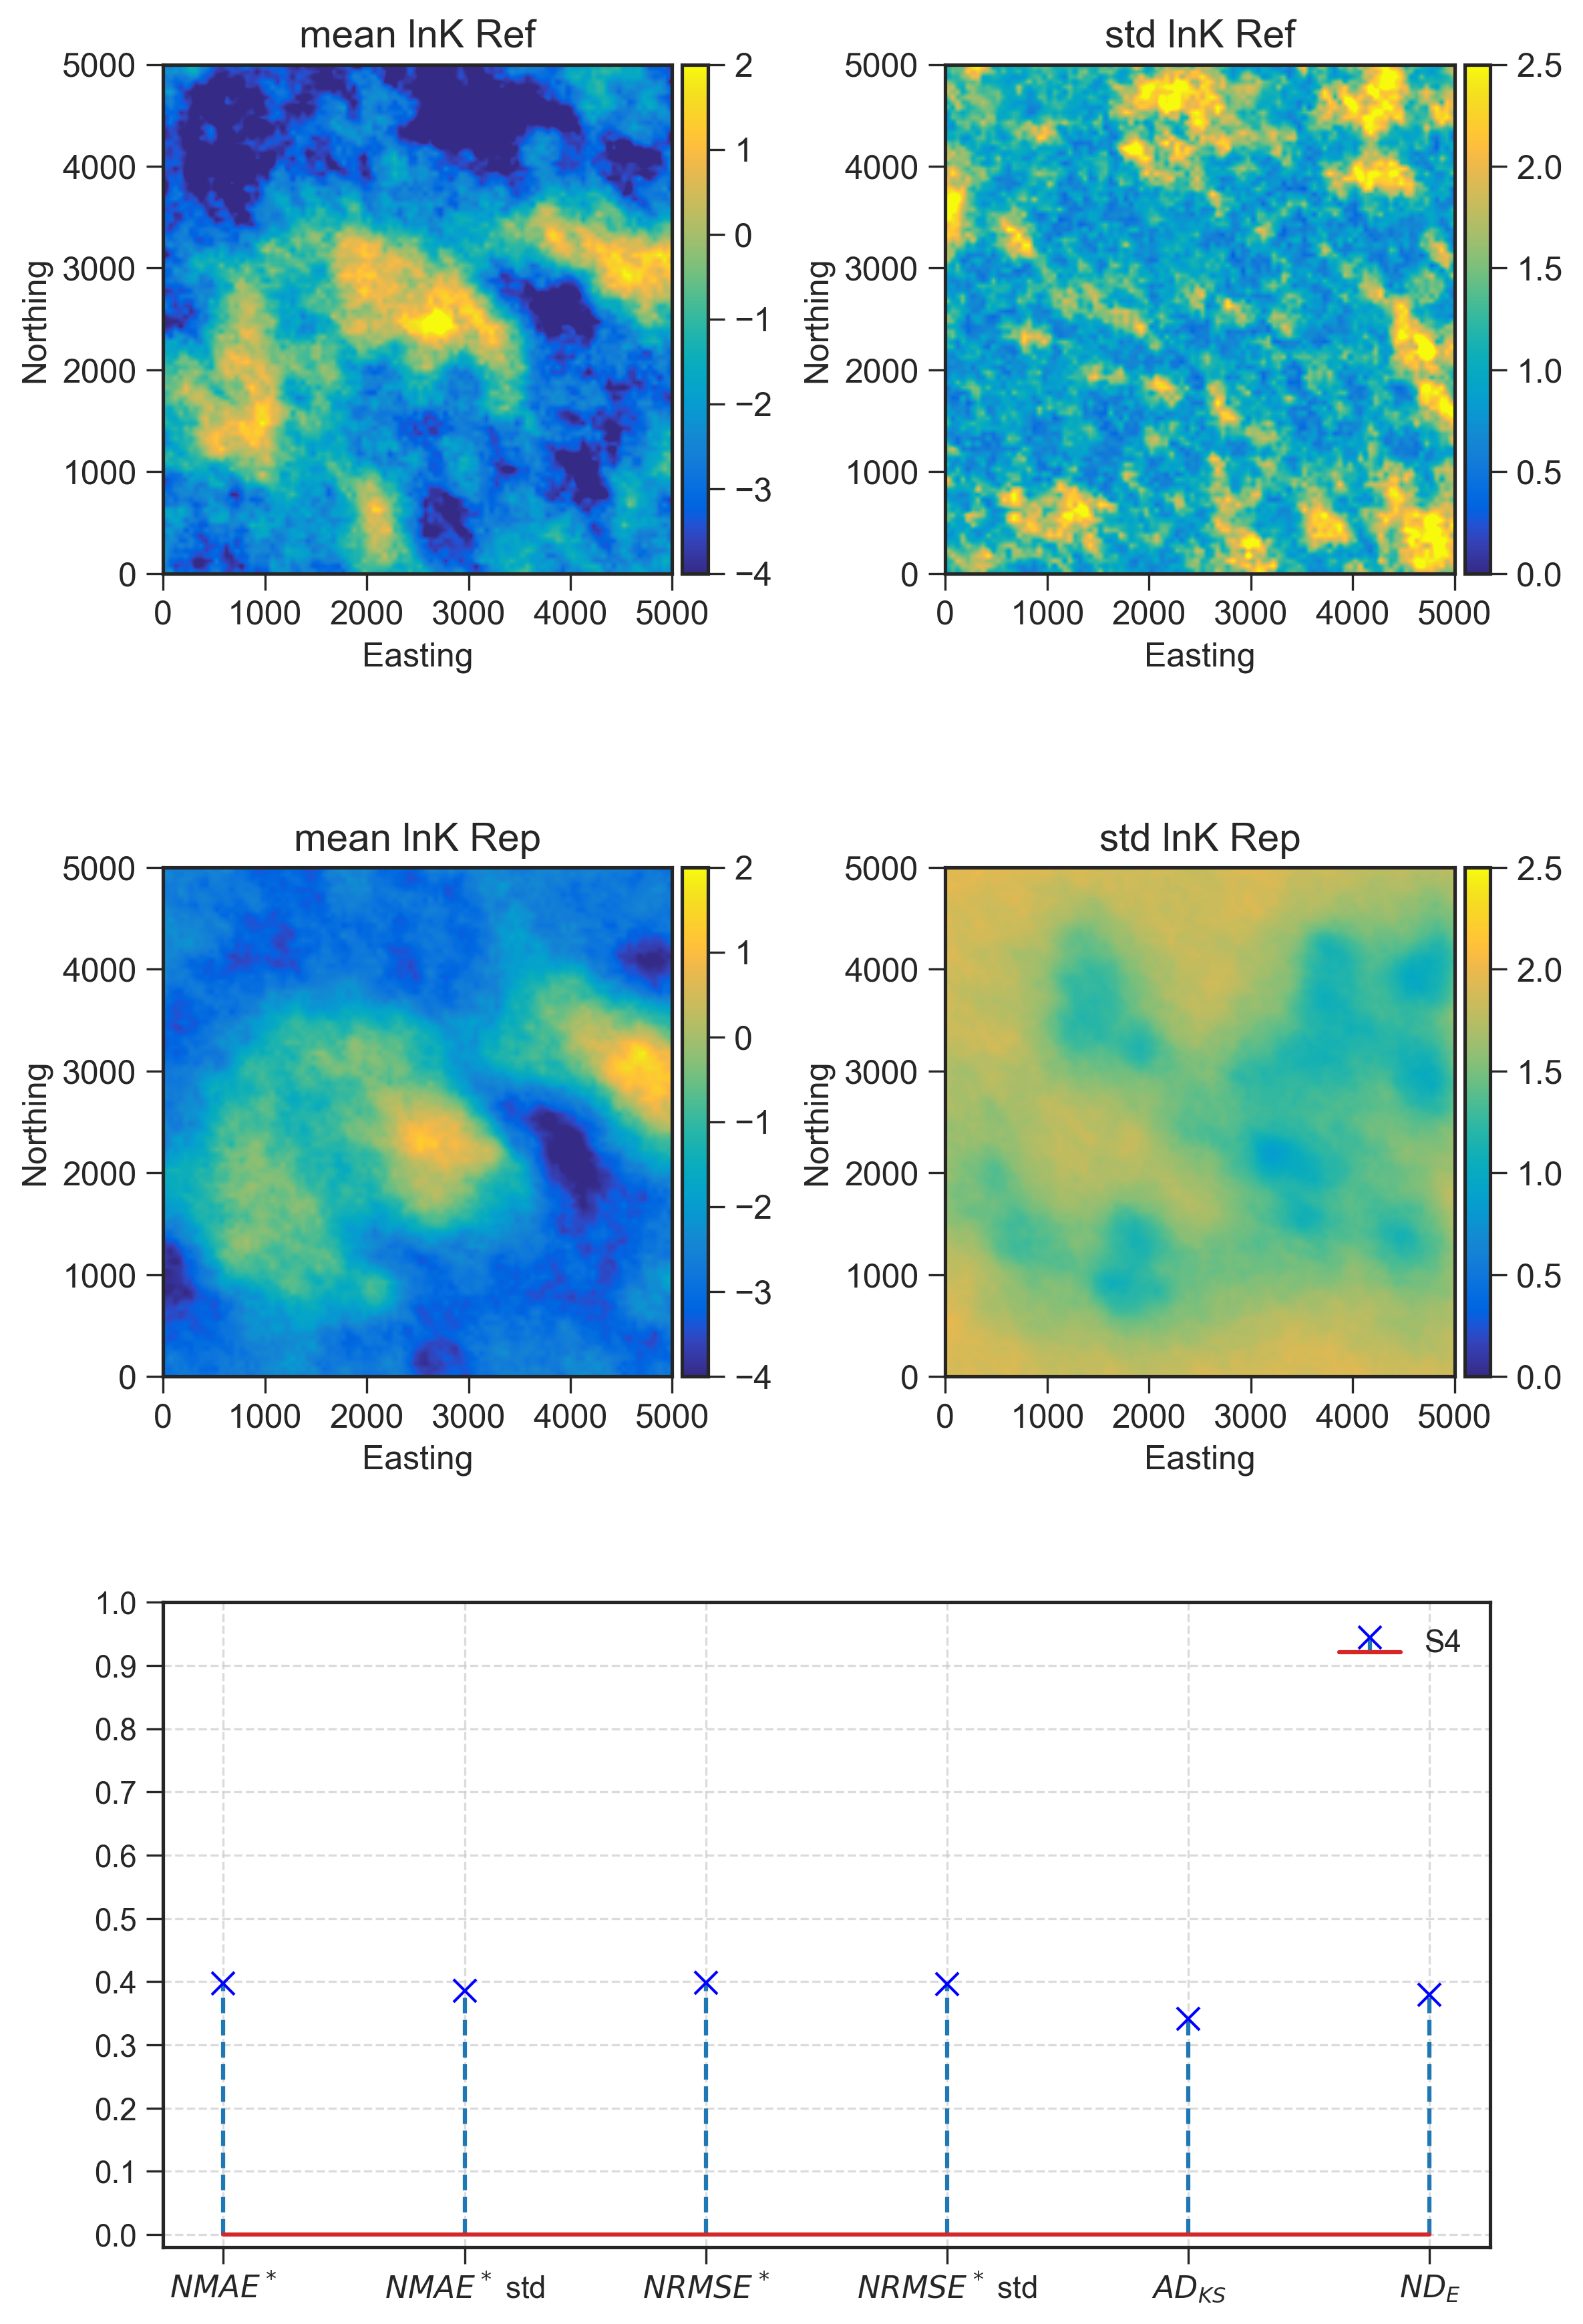

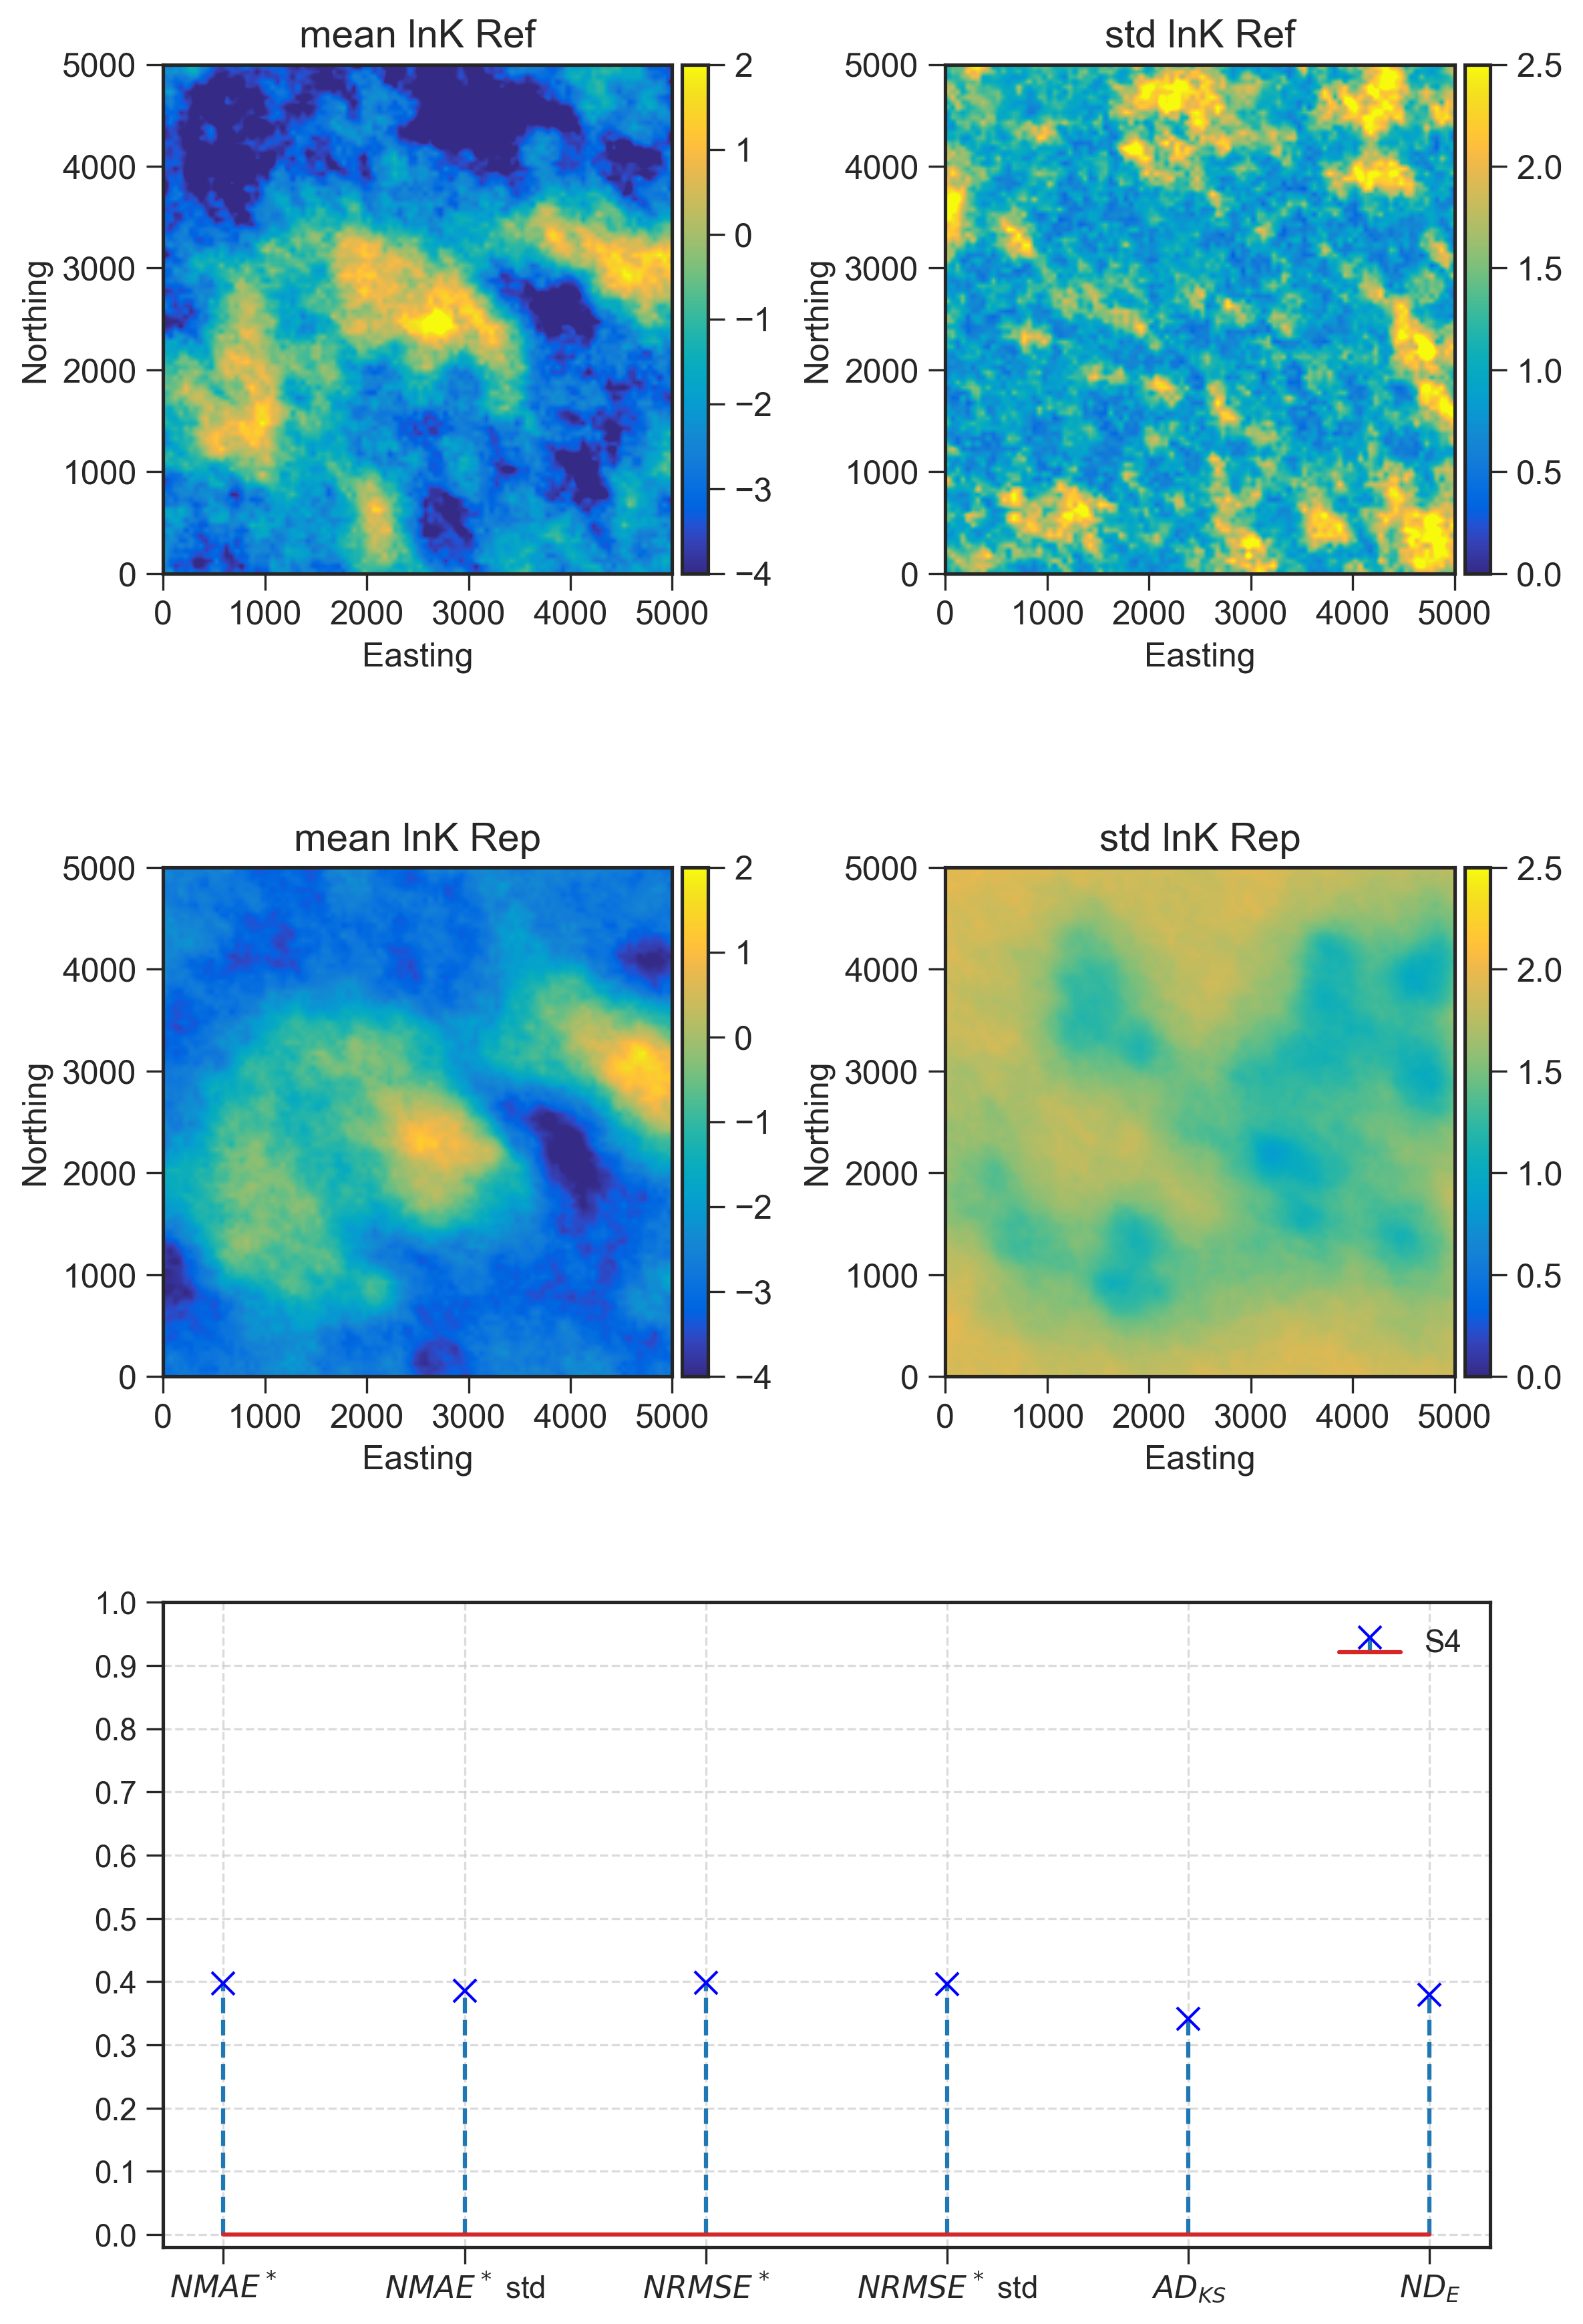

In [12]:
figS4_1000,tableS4_1000 = benchmark.make_comparison_plot()
figS4_1000

### For the comparison with EnKF_100, we ran an extra replication run with fewer iterations:

In [22]:
# benchmark = BayesInvBench(pathlib.Path("../config/config.yaml").resolve())
# benchmark.scenario_name = "S4"
# # add directory of data
# benchmark.data_directory = pathlib.Path.joinpath(benchmark.current_dir, "data")
# # set reference path
# benchmark.set_reference_path()
# # set reference chain file paths
# benchmark.set_reference_chain_file_paths()
# # print(benchmark.reference_chain_file_paths)
# benchmark.load_replication_piezometric_head()
# benchmark.prepare_reference_data()
# benchmark.set_replication_name("rep_S4b_EnKF_100")
# benchmark.plot_ref_mean_field()
# benchmark.get_benchmark_table()
# figS4_100,tableS4_100 = benchmark.make_comparison_plot()
# figS4_100

#### To not have to run it and have proper rounding:

In [23]:
data2 = {
    'Metric': ["$NMAE^*$", "$NMAE^*$ std", "$NRMSE^*$", "$NRMSE^*$ std", "$AD_{KS}$", "$ND_E$"],
    'Original': [0.808, 0.520, 1.035, 0.605, 0.341, 8.073],
    'Normalized': [0.659, 0.625, 0.660, 0.657, 0.341, 0.379],
    'TNormalized': [0.397, 0.385, 0.398, 0.396, 0.341, 0.379]
}
tableS4_1000 = pd.DataFrame(data2)
tableS4_1000.set_index('Metric', inplace=True)

In [24]:
data = {
    'Metric': ["$NMAE^*$", "$NMAE^*$ std", "$NRMSE^*$", "$NRMSE^*$ std", "$AD_{KS}$", "$ND_E$"],
    'Original': [1.294, 0.375, 1.626, 0.480, 0.477, 11.893],
    'Normalized': [1.056, 0.450, 1.038, 0.521, 0.545, 0.545],
    'TNormalized': [0.514, 0.310, 0.509, 0.343, 0.477, 0.477]
}
tableS4_100 = pd.DataFrame(data)
tableS4_100.set_index('Metric', inplace=True)

In [26]:
import pandas as pd


index = ["$NMAE^*$", "$NMAE^*$ std", "$NRMSE^*$", "$NRMSE^*$ std", "$AD_{KS}$", "$ND_E$"]

# Create a new row
LNF = np.round(0.75,6) # Measured
new_row = pd.DataFrame({'Original': [LNF], 'Normalized': [LNF], 'TNormalized': [LNF]}, index=['$LN_f$'])
# Concatenate the two DataFrames
tableS4_1000 = pd.concat([tableS4_1000, new_row])
T0f = 0.451 # Measured

new_row = pd.DataFrame({'Original': [T0f], 'Normalized': [T0f], 'TNormalized': [T0f]}, index=['$T_{o\%}$'])
# Concatenate the two DataFrames
tableS4_1000 = pd.concat([tableS4_1000, new_row])

tableS4_1000

Original  Normalized  TNormalized
$NMAE^*$          0.808       0.659        0.397
$NMAE^*$ std      0.520       0.625        0.385
$NRMSE^*$         1.035       0.660        0.398
$NRMSE^*$ std     0.605       0.657        0.396
$AD_{KS}$         0.341       0.341        0.341
$ND_E$            8.073       0.379        0.379
$LN_f$            0.750       0.750        0.750
$T_{o\%}$         0.451       0.451        0.451
$LN_f$            0.750       0.750        0.750
$T_{o\%}$         0.451       0.451        0.451

In [27]:
import pandas as pd

In [28]:
import pandas as pd

# Your existing DataFrame
# data = {
#     'Original': [5.001277, 1.206690, 3.944238, 1.098121, 0.912620, 29.177810],
#     'Normalized': [3.192114, 1.310411, 3.219174, 1.319245, 0.912620, 0.907848],
#     'TNormalized': [0.761457, 0.567177, 0.762987, 0.568825, 0.912620, 0.907848]
# }

index = ["$NMAE^*$", "$NMAE^*$ std", "$NRMSE^*$", "$NRMSE^*$ std", "$AD_{KS}$", "$ND_E$"]


# Create a new row
LNF = np.round(2/3,6)
new_row = pd.DataFrame({'Original': [LNF], 'Normalized': [LNF], 'TNormalized': [LNF]}, index=['$LN_f$'])
# Concatenate the two DataFrames
tableS4_100 = pd.concat([tableS4_100, new_row])
T0f = 0.168

new_row = pd.DataFrame({'Original': [T0f], 'Normalized': [T0f], 'TNormalized': [T0f]}, index=['$T_{o\%}$'])
# Concatenate the two DataFrames
tableS4_100 = pd.concat([tableS4_100, new_row])

tableS4_100

Original  Normalized  TNormalized
$NMAE^*$        1.294000    1.056000     0.514000
$NMAE^*$ std    0.375000    0.450000     0.310000
$NRMSE^*$       1.626000    1.038000     0.509000
$NRMSE^*$ std   0.480000    0.521000     0.343000
$AD_{KS}$       0.477000    0.545000     0.477000
$ND_E$         11.893000    0.545000     0.477000
$LN_f$          0.666667    0.666667     0.666667
$T_{o\%}$       0.168000    0.168000     0.168000

In [29]:
newindex = ["$NMAE^*$ (A)", "$NMAE^*$ std (A)", "$NRMSE^*$ (A)", "$NRMSE^*$ std(A) ", "$AD_{KS}$ (B)", "$ND_E$ (C)",'$LN_f$ (D)','$T_{o}$ (B)']
for (i,inn) in enumerate(["$NMAE^*$", "$NMAE^*$ std", "$NRMSE^*$", "$NRMSE^*$ std", "$AD_{KS}$", "$ND_E$",'$LN_f$','$T_{o\%}$']):
    tableS4_100 = tableS4_100.rename(index={inn: newindex[i]})

In [30]:
newindex = ["$NMAE^*$ (A)", "$NMAE^*$ std (A)", "$NRMSE^*$ (A)", "$NRMSE^*$ std(A) ", "$AD_{KS}$ (B)", "$ND_E$ (C)",'$LN_f$ (D)','$T_{o}$ (B)']
for (i,inn) in enumerate(["$NMAE^*$", "$NMAE^*$ std", "$NRMSE^*$", "$NRMSE^*$ std", "$AD_{KS}$", "$ND_E$",'$LN_f$','$T_{o\%}$']):
    tableS4_1000 = tableS4_1000.rename(index={inn: newindex[i]})

In [31]:
tableS4_1000

Original  Normalized  TNormalized
$NMAE^*$ (A)          0.808       0.659        0.397
$NMAE^*$ std (A)      0.520       0.625        0.385
$NRMSE^*$ (A)         1.035       0.660        0.398
$NRMSE^*$ std(A)      0.605       0.657        0.396
$AD_{KS}$ (B)         0.341       0.341        0.341
$ND_E$ (C)            8.073       0.379        0.379
$LN_f$ (D)            0.750       0.750        0.750
$T_{o}$ (B)           0.451       0.451        0.451
$LN_f$ (D)            0.750       0.750        0.750
$T_{o}$ (B)           0.451       0.451        0.451

In [32]:
tableS4_1000.to_csv("tableS4_1000.csv")

In [33]:
tableS4_100.to_csv("tableS4_100.csv")

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Create a figure and axis with a MATLAB-compatible theme
# plt.style.use('seaborn-v0_8-ticks')  # Apply MATLAB-like theme
# fig, ax1 = plt.subplots(figsize=(9, 3))
# # ax2 = ax1.twinx()  # Create a twin y-axis (y-axis number 1) for the data from tableS4_1000 and tableS4_100

# # Sample data from tableS4_1000 and tableS4_100
# categories = tableS4_1000.index.tolist()
# values1 = np.round(tableS4_1000['TNormalized'].tolist(), 3)
# values2 = np.round(tableS4_100['TNormalized'].tolist(), 3)

# # Plot the first stem plot on y-axis number 1 (ax1)
# markerline1, stemlines1, baseline1 = ax1.stem(categories, values1, markerfmt='s', linefmt='-.', label="EnKF 1000 S4")
# markerline1.set_markerfacecolor('r')
# markerline1.set_markeredgecolor('r')
# markerline1.set_markersize(6)

# # Plot the second stem plot on y-axis number 1 (ax2)
# markerline2, stemlines2, baseline2 = ax2.stem(categories, values2, markerfmt='x', linefmt='--', label="EnKF 100 S4")

# # Customize marker properties for the second plot
# markerline2.set_markerfacecolor('k')
# markerline2.set_markeredgecolor('k')
# markerline2.set_markersize(8)

# # Set y-axis limits for both y-axes
# ymin = 0.0
# ymax = 1.1
# ax1.set_ylim(ymin, ymax)


# # Create a third y-axis (ax3) on the right side for the inverse function
# ax3 = fig.add_subplot(111, frame_on=False)
# ax3.yaxis.tick_right()
# ax3.yaxis.set_label_position("right")

# # Sample data for the inverse function
# x_values = np.linspace(0.001, 1.0, 100)  # Adjust the range of x-values as needed

# # ymin_inverse = -10.0  # Adjust as needed based on the range of the inverse function
# # ymax_inverse = 10.0  # Adjust as needed based on the range of the inverse function
# # ax3.set_ylim(ymin_inverse, ymax_inverse)

# # Set x-axis and y-axis labels for ax3, adjust font size and family as needed
# ax3.set_xticks([])
# ax3.set_yticks([])
# # ax3.set_ylabel('Inverse Function', fontsize=11, fontfamily='sans-serif', rotation=-90, labelpad=20)

# # Set gridlines for all axes
# ax1.grid(True, linestyle='--', alpha=0.7)

# # Set x-axis and y-axis labels for ax1 and ax2, adjust font size and family as needed
# categories = tableS4_1000.index.tolist()
# ax1.set_xticklabels(categories, fontsize=11, fontfamily='sans-serif')
# ytick_positions1 = np.arange(ymin, ymax, 0.1)
# ytick_labels1 = [f'{val:.1f}' for val in ytick_positions1]
# print(ytick_positions1)
# print(ytick_labels1)
# ax1.set_yticks(ytick_positions1)
# ax1.set_yticklabels(ytick_labels1, fontsize=11, fontfamily='sans-serif')

# frev = lambda x: -(x)/(x-1)
# ax3.set_yticks(ytick_positions1[0:-2])
# tpos = np.round([frev(i) for i in ytick_positions1[0:-2]],2)
# print(tpos)
# ax3.set_yticklabels(tpos, fontsize=11, fontfamily='sans-serif')
# # ax3.xaxis.set_label_position('top')
# # Adjust legend label font size for ax1 and ax2
# lines1, labels1 = ax1.get_legend_handles_labels()
# # lines2, labels2 = ax2.get_legend_handles_labels()
# ax1.legend(lines1, labels1, loc='upper left', fontsize=11)

# plt.xticks(rotation=45)

# # Save the figure as a PDF file
# # plt.savefig('figures/stem_plot_with_inverse_function.pdf', format='pdf', bbox_inches='tight')

# # Show the plot
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Create a figure and axis with a MATLAB-compatible theme
# plt.style.use('seaborn-v0_8-ticks')  # Apply MATLAB-like theme
# fig, ax = plt.subplots(figsize=(9, 3))
# # Sample data
# categories = tableS4_100.index.tolist()
# values = np.round(tableS4_100['TNormalized'].tolist(), 3)

# markerline, stemlines, baseline = ax.stem(categories, values, markerfmt='s', linefmt='-.', label="EnKF 100 S4")
# markerline.set_markerfacecolor('r')
# markerline.set_markeredgecolor('r')
# markerline.set_markersize(6)

# categories = tableS4_1000.index.tolist()
# values = np.round(tableS4_1000['TNormalized'].tolist(), 3)

# # Plot the stem plot
# markerline, stemlines, baseline = ax.stem(categories, values, markerfmt='x', linefmt='--', label="EnKF 1000 S4")

# # Customize marker properties
# markerline.set_markerfacecolor('k')
# markerline.set_markeredgecolor('k')
# markerline.set_markersize(8)

# # Set y-axis limits
# ymin = 0.0
# ymax = 1.1

# # Set gridlines
# ax.grid(True, linestyle='--', alpha=0.7)  # Add gridlines with dashed style

# ax.set_xticklabels(categories, fontsize=11, fontfamily='sans-serif')  # Change 'sans-serif' to a font family available on your system
# ytick_positions = np.arange(ymin, ymax, 0.1)
# ytick_labels = [f'{val:.1f}' for val in ytick_positions]
# ax.set_yticks(ytick_positions)
# ax.set_yticklabels(ytick_labels, fontsize=11, fontfamily='sans-serif')  # Adjust fontsize for ytick labels

# # Adjust legend label font size
# ax.legend(fontsize=11)
# ax.set_ylim(0, 1.1)
# plt.xticks(rotation=45)

# # Create a right y-axis (ax2)
# ax2 = ax.twinx()

# # Define a function for the inverse transformation
# f_inverse = lambda x: -(x) / (x - 1)

# # Set y-axis limits for ax2 and apply the inverse transformation to the y-ticks
# ytick_positions2 = np.array([0.1, 0.5, 0.9])  # Adjust the positions as needed
# ytick_labels2 = np.round(f_inverse(ytick_positions2), 2)
# ax2.set_yticks(ytick_positions2)
# ax2.set_yticklabels(ytick_labels2, fontsize=11, fontfamily='sans-serif')
# ax2.set_ylim(f_inverse(ymax), f_inverse(ymin))  # Reverse the limits due to the inverse transformation

# # Hide the right y-axis spines and ticks
# ax2.spines['right'].set_visible(True)
# ax2.yaxis.tick_right()

# # Label the right y-axis
# # ax2.set_ylabel('Inverse Transformation', fontsize=11, fontfamily='sans-serif')

# # Save the figure as a PDF file
# plt.savefig('figures/stem_plot_100_vs_1000.pdf', format='pdf', bbox_inches='tight')

# # Show the plot
# plt.show()

In [ ]:
# plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
# plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

In [ ]:

# Create a figure and axis with a MATLAB-compatible theme
plt.style.use('seaborn-v0_8-ticks')  # Apply MATLAB-like theme
fig, ax = plt.subplots(figsize=(9, 3))
plt.gca().set_frame_on(True)

# Sample data
# Sample data
categories = tableS4_100.index.tolist()
values = np.round(tableS4_100['TNormalized'].tolist(),3)

markerline, stemlines, baseline = ax.stem(categories, values,markerfmt="+",linefmt = 'k:',label="EnKF 100 S4 vs. reference")
markerline.set_markerfacecolor('r')
markerline.set_markeredgecolor('r')
markerline.set_markersize(10)




categories = tableS4_1000.index.tolist()
values = np.round(tableS4_1000['TNormalized'].tolist(),3)
print(values)


# Plot the stem plot


markerline, stemlines, baseline = ax.stem(categories, values,markerfmt='x', linefmt = 'k:',label="EnKF 1000 S4 vs. reference")

# Customize marker properties
markerline.set_markerfacecolor('k')
markerline.set_markeredgecolor('k')
markerline.set_markersize(8)


# Set y-axis limits
ymin = 0.0
ymax = 1.1

# Set gridlines
ax.grid(True, linestyle='--', alpha=0.7)  # Add gridlines with dashed style

ax.set_xticklabels(categories, fontsize=11, fontfamily='sans-serif')  # Change 'sans-serif' to a font family available on your system
ytick_positions = np.arange(ymin, ymax, 0.1)
ytick_labels = [f'{val:.1f}' for val in ytick_positions]
ax.set_yticks(ytick_positions)
ax.set_yticklabels(ytick_labels, fontsize=11, fontfamily='sans-serif')  # Adjust fontsize for ytick labels
# ax.set_xlabel('Categories', fontsize=11, fontfamily='sans-serif')  # Change 'sans-serif' to a font family available on your system
ax.set_ylabel('Scale A (transformed $\in [0,1]$) \n / Scale B (original decimal value)', fontsize=9, fontfamily='sans-serif')  # Change 'sans-serif' to a font family available on your system

# Adjust legend label font size
ax.legend(fontsize=11)
ax.set_ylim(0, 1.1)
plt.xticks(rotation=45)


##

# ax3 = fig.add_subplot(111, frame_on=False)
# ax3.yaxis.tick_right()
# ax3.yaxis.set_label_position("right")
# # ax3 = ax3.twinx()

# ax3.set_xticks([])
# ax3.set_yticks([])
# frev = lambda x: -(x)/(x-1)
# ax3.set_yticks(ytick_positions1[0:-2])
# tpos = np.round([frev(i) for i in ytick_positions1[0:-2]],2)
# print(tpos)

# ax3.set_yticklabels(tpos, fontsize=11, fontfamily='sans-serif')
# ax3.spines['right'].set_visible(True)

# Create a right y-axis (ax3)
ax3 = ax.twinx()

# Define a function for the inverse transformation
f_inverse = lambda x:-(x) / (x - 1)

# Set y-axis limits for ax3 and apply the inverse transformation to the y-ticks
# ytick_positions = np.arange(ymin, ymax, 0.1)
ytick_labels = np.round(f_inverse(ytick_positions), 2)
# ytick_labels = ytick_labels[0:-1]
# ytick_labels[-1] = np.inf
# ytick_positions = ytick_positions[0:-1]
ax3.set_yticks(ytick_positions)
ax3.set_yticklabels(ytick_labels, fontsize=11, fontfamily='sans-serif')

# Label the right y-axis
ax3.set_ylabel('Scale C (only normalized)', fontsize=9, fontfamily='sans-serif')

ax3.spines[['right']].set_visible(True)
# ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
# ax3.tick_params(axis='y', labelcolor='w')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# Save the figure as a PDF file
plt.savefig('../figures/stem_plot_100_vs_1000.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
ytick_positions = np.arange(ymin, ymax, 0.1)
xtest = np.linspace(0.2,100,5)
xltest = np.log(xtest)
xlttest = xltest/(1+xltest)


In [ ]:
xltest

In [ ]:
xlttest